![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Introduction

In today's data-driven world, understanding the relationships between different pieces of information is crucial. Knowledge graphs have emerged as a powerful way to visualize and explore these connections, transforming unstructured text into a structured network of entities and their relationships. We will guide you through a simple workflow for creating a knowledge graph from textual data, making complex information more accessible and easier to understand.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Installing Dependencies

In [1]:
!pip3 install langchain==0.0.208 deeplake openai==0.27.8 python-dotenv tiktoken pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.9/607.9 kB 12.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.0 MB/s eta 0:

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Mount Google Drive & Load API Keys

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


All the API Keys are stored in file "llm_env". It's contents are as below:

ACTIVELOOP_TOKEN=<[Your Activeloop API Key](https://app.activeloop.ai/register)>

OPENAI_API_KEY=<[Your OpenAI API Key](https://platform.openai.com/)>

GOOGLE_API_KEY=<[Your Google API Key](https://console.cloud.google.com/apis/credentials)>

GOOGLE_CSE_ID=<[Your Google Custom Search Engine ID](https://programmablesearchengine.google.com/controlpanel/create)>

HUGGINGFACEHUB_API_TOKEN=<[Your Hugging Face Access Token](https://huggingface.co/settings/tokens)>

In [2]:
from dotenv import load_dotenv

# Load API Keys for Deep Lake Vector Database, OpenAI, Google & Hugging Face
load_dotenv('/content/drive/MyDrive/ancilcleetus-github/llm_env')

True

In [ ]:
import os

print(f"os.environ['ACTIVELOOP_TOKEN']: \n{os.environ['ACTIVELOOP_TOKEN']}")
print(f"os.environ['OPENAI_API_KEY']: \n{os.environ['OPENAI_API_KEY']}")
print(f"os.environ['GOOGLE_API_KEY']: \n{os.environ['GOOGLE_API_KEY']}")
print(f"os.environ['GOOGLE_CSE_ID']: \n{os.environ['GOOGLE_CSE_ID']}")
print(f"os.environ['HUGGINGFACEHUB_API_TOKEN']: \n{os.environ['HUGGINGFACEHUB_API_TOKEN']}")

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. Workflow for Creating Knowledge Graphs from Textual Data

Here’s what we are going to do in this project.

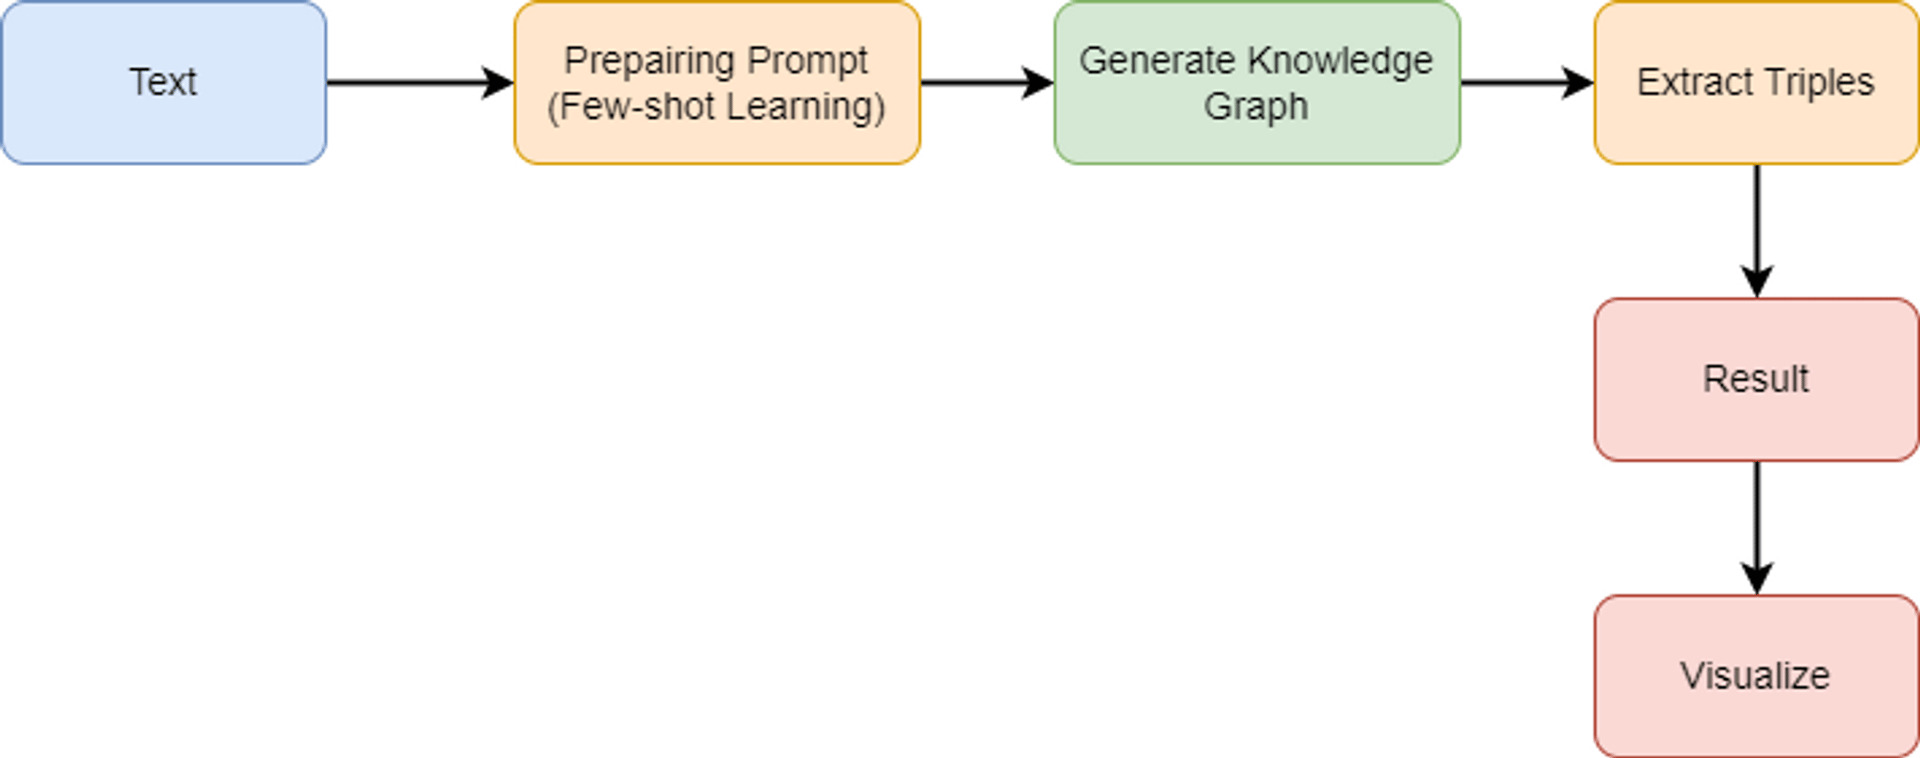

In [4]:
# Workflow for Creating Knowledge Graphs from Textual Data

from IPython import display
display.Image("data/images/GenAI-04-Knowledge-Graph-Workflow.jpg")

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 5. Knowledge Graphs Vs Knowledge Bases

Before diving deep into our main topic, it's important to have a clear understanding of the difference between Knowledge Graphs and Knowledge Bases.

The terms "knowledge graph" and "knowledge base" are often used interchangeably, but they have subtle differences. Knowledge base (KB) refers to structured information that we have about a domain of interest. On the other hand, a knowledge graph is a knowledge base structured as a graph, where nodes represent entities and edges signify relations between those entities. For example, from the text “Fabio lives in Italy,” we can extract the relation triplet `<Fabio, lives in, Italy>`, where “Fabio” and “Italy” are entities, and “lives in” it's their relation.

A knowledge graph is a particular type of knowledge base. A knowledge base is not necessarily a knowledge graph.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 6. Building a Knowledge Graph

The process of building a knowledge graph usually consists of two sequential steps:

1. **Named Entity Recognition (NER):** This step involves extracting entities from the text, which will eventually become the nodes of the knowledge graph.

2. **Relation Classification (RC):** In this step, relations between entities are extracted, forming the edges of the knowledge graph.

Then, the knowledge graph is commonly visualized using libraries such as `pyvis`.

Typically the process of creating a knowledge base from the text can be enhanced by incorporating additional steps, such as:

- **Entity Linking:** This involves normalizing entities to the same entity, such as “Napoleon” and “Napoleon Bonapart”. This is usually done by linking them to a canonical source, like a Wikipedia page.

- **Source Tracking:** Keeping track of the origin of each relation, such as the article URL and text span. Keeping track of the sources allows us to gather insights into the reliability of the extracted information (e.g., a relation is accurate if it can be extracted from several sources considered accurate).

In this project, we'll do the Named Entity Recognition and Relation Classification tasks simultaneously with an appropriate prompt. This joint task is commonly called Relation Extraction (RE).

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)